In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [3]:
# Importing the dataset
bank_pd = pd.read_csv('./bank csv/bank-additional-full.csv', sep=';')

In [4]:
# show the first 5 rows
print(bank_pd.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [5]:
# showing the shape of the data
print(bank_pd.shape)

(41188, 21)


In [6]:
# describe the data
print(bank_pd.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [7]:
# check for missing values
print(bank_pd.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


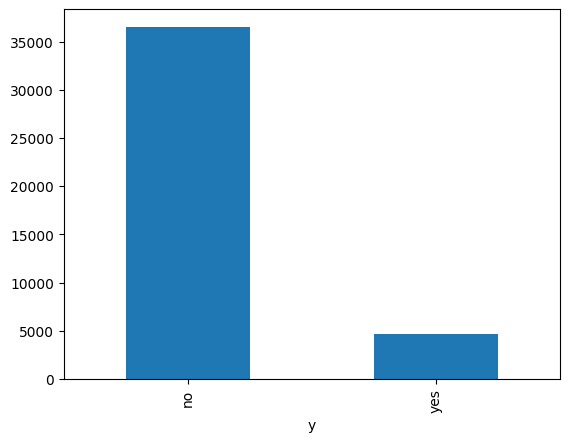

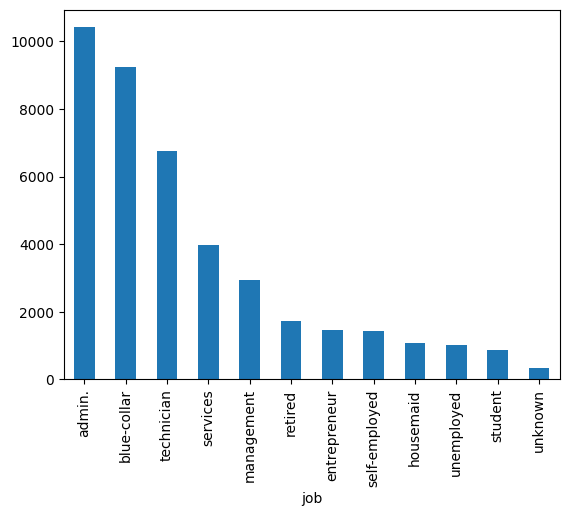

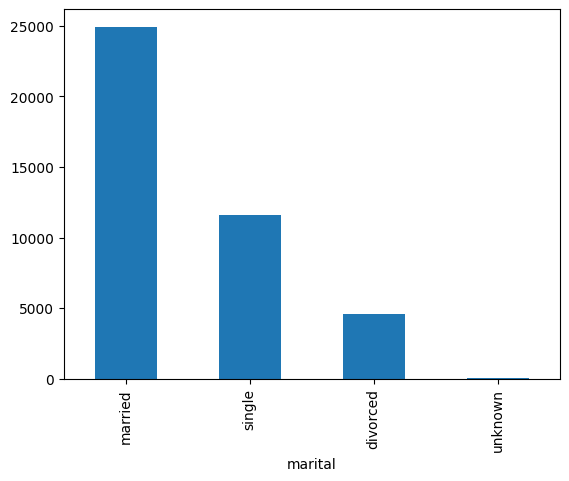

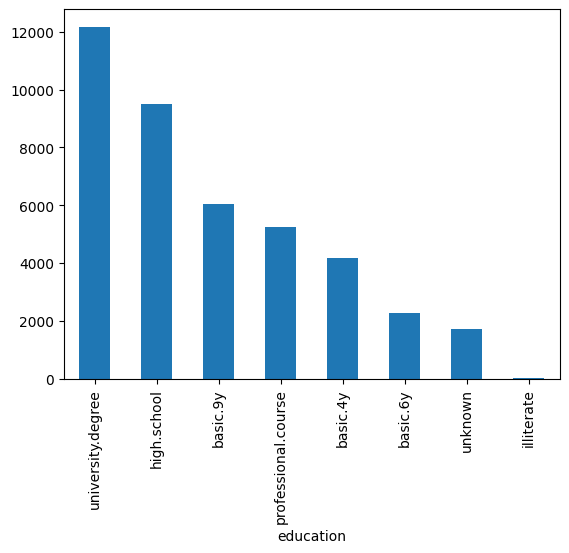

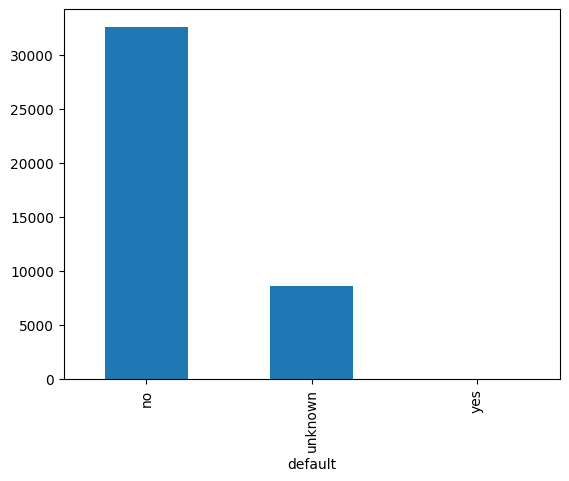

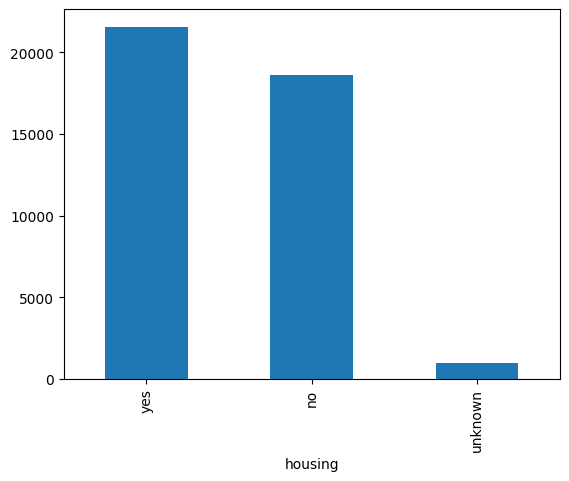

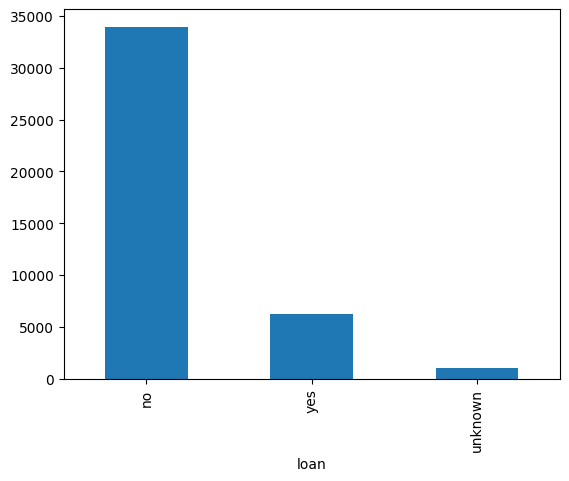

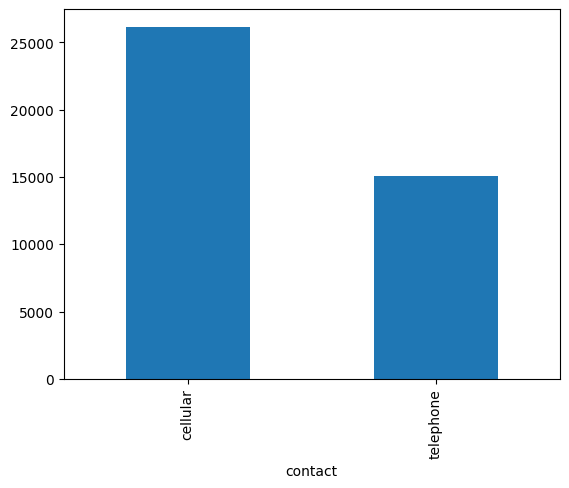

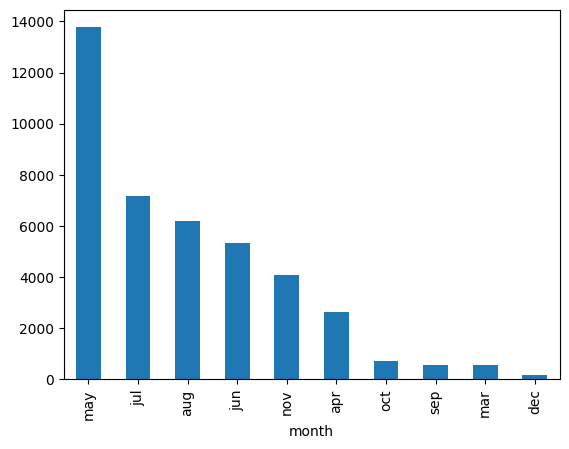

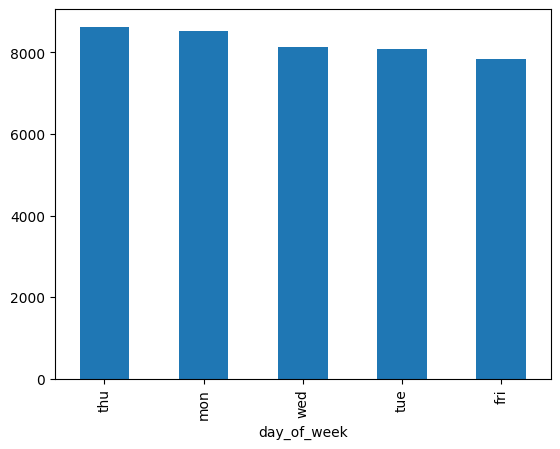

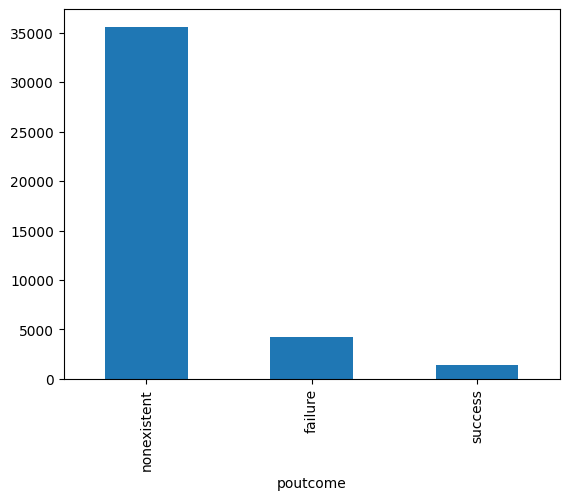

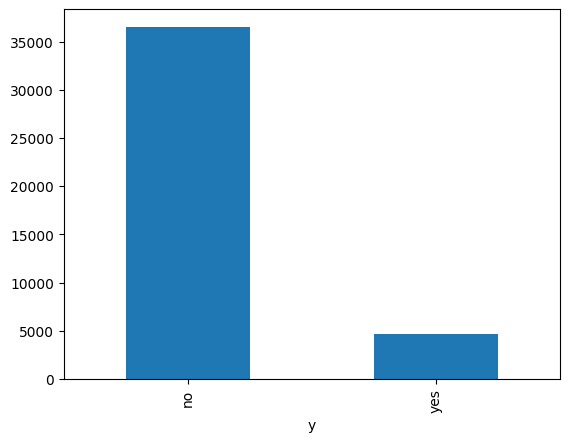

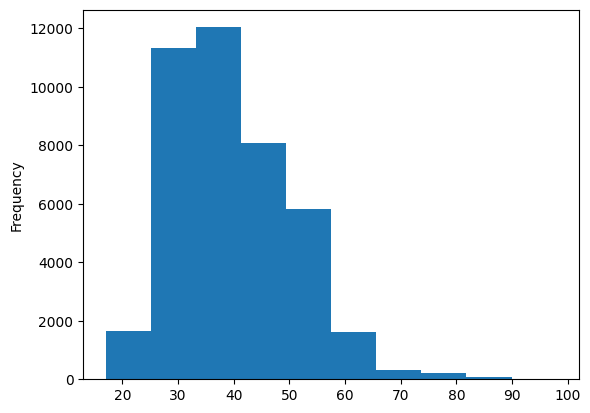

In [8]:
# visualizing the data
import matplotlib.pyplot as plt

# count of the target variable
bank_pd['y'].value_counts().plot(kind='bar')
plt.show()

# count of the job variable
bank_pd['job'].value_counts().plot(kind='bar')
plt.show()

# count of the marital variable
bank_pd['marital'].value_counts().plot(kind='bar')
plt.show()

# count of the education variable
bank_pd['education'].value_counts().plot(kind='bar')
plt.show()

# count of the default variable
bank_pd['default'].value_counts().plot(kind='bar')
plt.show()

# count of the housing variable
bank_pd['housing'].value_counts().plot(kind='bar')
plt.show()

# count of the loan variable
bank_pd['loan'].value_counts().plot(kind='bar')
plt.show()

# count of the contact variable
bank_pd['contact'].value_counts().plot(kind='bar')
plt.show()

# count of the month variable
bank_pd['month'].value_counts().plot(kind='bar')
plt.show()

# count of the day_of_week variable
bank_pd['day_of_week'].value_counts().plot(kind='bar')
plt.show()

# count of the poutcome variable
bank_pd['poutcome'].value_counts().plot(kind='bar')
plt.show()

# count of the y variable
bank_pd['y'].value_counts().plot(kind='bar')
plt.show()

# count of the age variable
bank_pd['age'].plot(kind='hist')
plt.show()


In [9]:
# check for categorical data
print(bank_pd.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [10]:
# check for unique values in the categorical data
print(bank_pd['job'].unique())
print(bank_pd['marital'].unique())
print(bank_pd['education'].unique())
print(bank_pd['default'].unique())
print(bank_pd['housing'].unique())
print(bank_pd['loan'].unique())
print(bank_pd['contact'].unique())
print(bank_pd['month'].unique())
print(bank_pd['day_of_week'].unique())
print(bank_pd['poutcome'].unique())
print(bank_pd['y'].unique())


['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
['no' 'yes']


In [11]:
# Encoding the categorical data
labelencoder_X = LabelEncoder()
bank_pd['job'] = labelencoder_X.fit_transform(bank_pd['job'])
bank_pd['marital'] = labelencoder_X.fit_transform(bank_pd['marital'])
bank_pd['education'] = labelencoder_X.fit_transform(bank_pd['education'])
bank_pd['default'] = labelencoder_X.fit_transform(bank_pd['default'])
bank_pd['housing'] = labelencoder_X.fit_transform(bank_pd['housing'])
bank_pd['loan'] = labelencoder_X.fit_transform(bank_pd['loan'])
bank_pd['contact'] = labelencoder_X.fit_transform(bank_pd['contact'])
bank_pd['month'] = labelencoder_X.fit_transform(bank_pd['month'])
bank_pd['day_of_week'] = labelencoder_X.fit_transform(bank_pd['day_of_week'])
bank_pd['poutcome'] = labelencoder_X.fit_transform(bank_pd['poutcome'])
bank_pd['y'] = labelencoder_X.fit_transform(bank_pd['y'])


In [12]:
# checking the data after encoding
print(bank_pd.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.85

In [13]:
# Splitting the data into dependent and independent variables
X = bank_pd.iloc[:, 0:20].values
y = bank_pd.iloc[:, 20].values



In [14]:
# checking the splitted data fully
print(X)
print(y)

[[ 5.6000e+01  3.0000e+00  1.0000e+00 ... -3.6400e+01  4.8570e+00
   5.1910e+03]
 [ 5.7000e+01  7.0000e+00  1.0000e+00 ... -3.6400e+01  4.8570e+00
   5.1910e+03]
 [ 3.7000e+01  7.0000e+00  1.0000e+00 ... -3.6400e+01  4.8570e+00
   5.1910e+03]
 ...
 [ 5.6000e+01  5.0000e+00  1.0000e+00 ... -5.0800e+01  1.0280e+00
   4.9636e+03]
 [ 4.4000e+01  9.0000e+00  1.0000e+00 ... -5.0800e+01  1.0280e+00
   4.9636e+03]
 [ 7.4000e+01  5.0000e+00  1.0000e+00 ... -5.0800e+01  1.0280e+00
   4.9636e+03]]
[0 0 0 ... 0 1 0]


In [15]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# showing the shape of the splitted data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 20)
(8238, 20)
(32950,)
(8238,)


In [16]:
# Fitting the Decision Tree Classifier to the training set
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
# accuracy of the model on training set and testing set
y_test_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)

print('Accuracy on training set: ', accuracy_score(y_train, y_train_pred))
print('Accuracy on testing set: ', accuracy_score(y_test, y_test_pred))



Accuracy on training set:  1.0
Accuracy on testing set:  0.8894149065307113


In [18]:
#confusion matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

# classification report
classification_report = classification_report(y_test, y_test_pred)
print(classification_report)

[[6847  472]
 [ 439  480]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7319
           1       0.50      0.52      0.51       919

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



In [28]:

# Set up the input as an array
# input_array = np.array([35, "technician", "married", "university.degree", "no", "no", "yes", "telephone", "may", "mon", 99, 1, 999, 0, "nonexistent", 1.1, 93.994, -36.4, 4.857, 5191])
input_array = np.array([49.0, 'entrepreneur', 'married', 'university.degree', 'unknown', 'yes', 'no', 'telephone', 'may', 'mon', 1042.0, 1.0, 999.0, 0.0, 'nonexistent', 1.1, 93.994, -36.4, 4.857, 5191.0])


# Encode the input array
input_array[1] = labelencoder_X.fit_transform([input_array[1]])[0]
input_array[2] = labelencoder_X.fit_transform([input_array[2]])[0]
input_array[3] = labelencoder_X.fit_transform([input_array[3]])[0]
input_array[4] = labelencoder_X.fit_transform([input_array[4]])[0]
input_array[5] = labelencoder_X.fit_transform([input_array[5]])[0]
input_array[6] = labelencoder_X.fit_transform([input_array[6]])[0]
input_array[7] = labelencoder_X.fit_transform([input_array[7]])[0]
input_array[8] = labelencoder_X.fit_transform([input_array[8]])[0]
input_array[9] = labelencoder_X.fit_transform([input_array[9]])[0]
input_array[14] = labelencoder_X.fit_transform([input_array[14]])[0]


# Reshape the input array to match the shape of the training data
input_array = input_array.reshape(1, -1)



# Predict the result
result = classifier.predict(input_array)

# Convert the predicted result to "yes" or "no"
if result == 1:
    prediction = "yes"
else:
    prediction = "no"

# Print the prediction
print("The predicted result is:", prediction)

The predicted result is: no
